In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
class svm_scratch:
    def __init__(self, learning_rate=0.001, lambda_para=0.01,n_iters=10000):
        self.w=None
        self.b=None
        self.lr=learning_rate
        self.lam=lambda_para
        self.n_iters=n_iters
    def fit(self,x,y):
        y_=np.where(y<=0,-1,1)
        samp,feat=x.shape
        
        self.w=np.zeros(feat)
        self.b=0
        
        for _ in range(self.n_iters):
            for id,xv in enumerate(x):
                condition=y_[id]*(np.dot(xv,self.w)-self.b)>=1
                if condition:
                    self.w-=self.lr*(2*self.lam*self.w)
                else:
                    self.w-=self.lr*(2*self.lam*self.w-np.dot(xv,y_[id]))
                    self.b-=self.lr*y_[id]
        pass
    
    
    def predict(self,x):
        linear_output=np.dot(x,self.w)-self.b
        return np.sign(linear_output)

In [153]:
from sklearn import datasets

In [154]:
x, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

In [155]:
y_=[1 if i>0 else -1 for i in y]

In [158]:
clf = svm_scratch()


In [159]:
clf.fit(x, y)

In [160]:
X=x

In [161]:
print(clf.w, clf.b)

[0.45257302 0.25017548] -0.8350000000000006


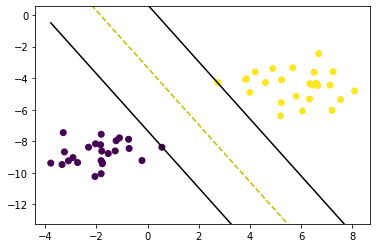

In [163]:


def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()
